In [1]:
from datetime import datetime
start_time = datetime.now()


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score,precision_recall_curve,roc_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
import time
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
from sklearn.metrics import confusion_matrix

In [2]:
data=pd.read_csv('applications data.csv', index_col=0)
data

,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label
record,,,,,,,,,
1,20160101,379070012,XRRAMMTR,SMJETJMJ,6861 EUTST PL,2765,19070626,1797504115,0
2,20160101,387482503,MAMSTUJR,RTTEMRRR,7280 URASA PL,57169,19340615,4164239415,1
3,20160101,200332444,SZMMUJEZS,EUSEZRAE,5581 RSREX LN,56721,19070626,216537580,0
4,20160101,747451317,SJJZSXRSZ,ETJXTXXS,1387 UJZXJ RD,35286,19440430,132144161,0
5,20160101,24065868,SSSXUEJMS,SSUUJXUZ,279 EAASA WY,3173,19980315,6101082272,0
...,...,...,...,...,...,...,...,...,...
999996,20161231,766104848,XUSAAURMZ,EJXXEXZX,8079 EJRUJ AVE,54890,19550418,8236558223,0
999997,20161231,445178058,SAAJJEMTX,UMAUETJX,4817 UMSXT AVE,74683,19150624,6790134432,0
999998,20161231,25283410,ESRXXRSUX,EUEJRJJE,7562 RJMAZ ST,86805,19880628,3997657622,0


### Summary table

In [3]:
data.columns

Index(['date', 'ssn', 'firstname', 'lastname', 'address', 'zip5', 'dob',
       'homephone', 'fraud_label'],
      dtype='object')

In [4]:
column=['ssn', 'firstname', 'lastname', 'address', 'zip5', 'homephone', 'fraud_label']

#### most common

In [31]:
data['ssn'].value_counts(dropna=False, normalize=True)

999999999    0.016935
938972725    0.000114
810776805    0.000081
829352390    0.000074
473311863    0.000044
               ...   
555160692    0.000001
89796279     0.000001
60236914     0.000001
232246383    0.000001
622713275    0.000001
Name: ssn, Length: 835819, dtype: float64

In [11]:
len(set(data['ssn']))

835819

In [14]:
len(data['ssn'])

1000000

#### % Populated

In [16]:
(len(data['ssn'])-data['ssn'].isnull().sum())/len(data['ssn'])

1.0

In [27]:
df=[]
for i in column:
    record=len(data[i])
    populate=(len(data[i])-data[i].isnull().sum())/len(data[i])
    unique=len(set(data[i]))
    common=data[i].value_counts(dropna=False, normalize=True).index[0]
    df.append([i,record,populate,unique,common])
df1=pd.DataFrame(df,columns=['Comuln Name','# of Records','% Populated', 'Unique Values', 'Most Common Field Value'])
df1

,Comuln Name,# of Records,% Populated,Unique Values,Most Common Field Value
0,ssn,1000000,1.0,835819,999999999
1,firstname,1000000,1.0,78136,EAMSTRMT
2,lastname,1000000,1.0,177001,ERJSAXA
3,address,1000000,1.0,828774,123 MAIN ST
4,zip5,1000000,1.0,26370,68138
5,homephone,1000000,1.0,28244,9999999999
6,fraud_label,1000000,1.0,2,0


In [29]:
df1.to_excel('summary table.xlsx', index = False)

### Distribution

##### SSN & homephone & dob

In [52]:
data['ssn'].value_counts().iloc[1:12]

938972725    114
810776805     81
829352390     74
473311863     44
165764866     34
189622157     30
295308935     30
588726212     29
163830210     29
687424410     28
826488428     25
Name: ssn, dtype: int64

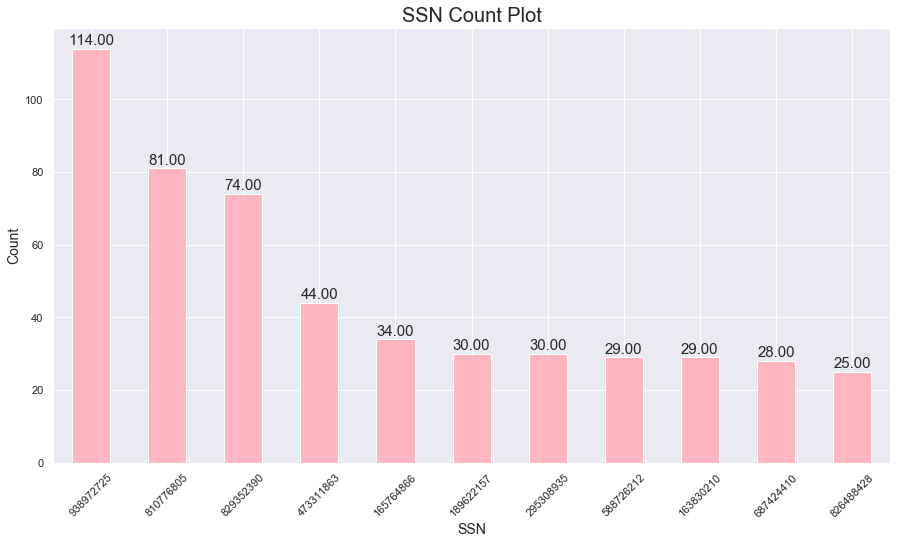

In [51]:
sns.set(style='darkgrid')
plt.figure(figsize=(15, 8)) 
plots=data['ssn'].value_counts().iloc[1:12].plot(kind='bar', color='lightpink')
for bar in plots.patches: 
    
  # Using Matplotlib's annotate function and 
  # passing the coordinates where the annotation shall be done 
  # x-coordinate: bar.get_x() + bar.get_width() / 2 
  # y-coordinate: bar.get_height() 
  # free space to be left to make graph pleasing: (0, 8) 
  # ha and va stand for the horizontal and vertical alignment 
    plots.annotate(format(bar.get_height(), '.2f'),  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='center', 
                   size=15, xytext=(0, 8), 
                   textcoords='offset points') 
# Setting the label for x-axis 
plt.xlabel("SSN", size=14) 
  
# Setting the label for y-axis 
plt.ylabel("Count", size=14) 
  
# Setting the title for the graph 
plt.title("SSN Count Plot", size=20) 
plt.xticks(rotation=45)
  
# Fianlly showing the plot 
plt.show() 

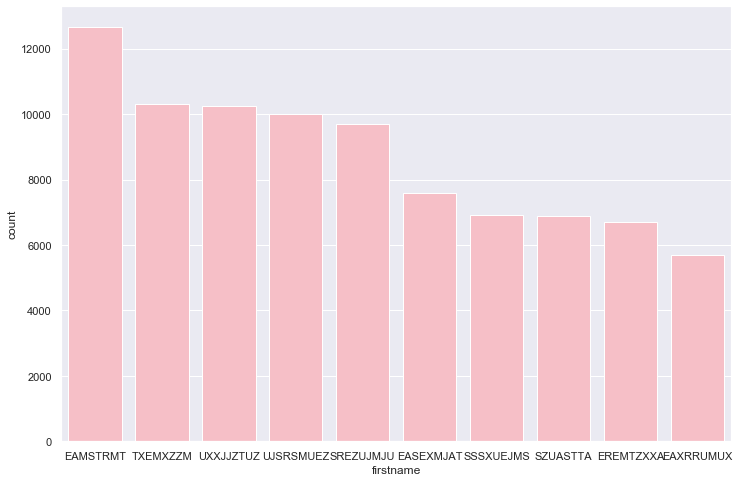

In [108]:
sns.set(style='darkgrid')
# Defining the plot size 
plt.figure(figsize=(12, 8)) 
sns.countplot(data = data,
              x = "firstname",
              order = data['firstname'].value_counts()[:10].index,
             color='lightpink')
plt.show() 

In [6]:
ssn=pd.DataFrame(data['date'].value_counts().head(15))
ssn=ssn.reset_index()
#ssn=ssn.iloc[1:]
ssn

,index,date
0,20160816,2877
1,20160304,2861
2,20160718,2849
3,20160417,2848
4,20160101,2840
5,20161228,2832
6,20160903,2832
7,20160808,2832
8,20160827,2831
9,20160609,2831


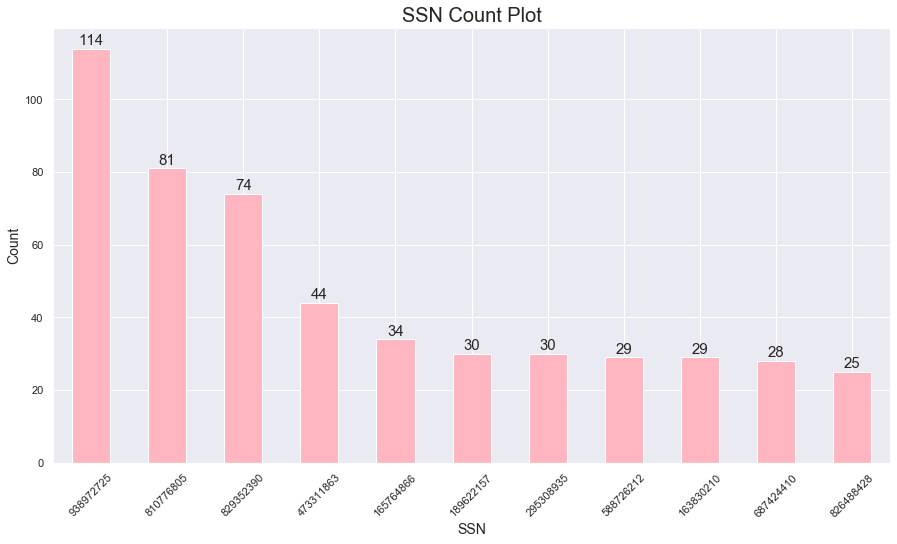

In [12]:
sns.set(style='darkgrid')
plt.figure(figsize=(15, 8)) 
plots=data['ssn'].value_counts().iloc[1:12].plot(kind='bar', color='lightpink')
for bar in plots.patches: 
    
  # Using Matplotlib's annotate function and 
  # passing the coordinates where the annotation shall be done 
  # x-coordinate: bar.get_x() + bar.get_width() / 2 
  # y-coordinate: bar.get_height() 
  # free space to be left to make graph pleasing: (0, 8) 
  # ha and va stand for the horizontal and vertical alignment 
    plots.annotate(format(bar.get_height()),  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='center', 
                   size=15, xytext=(0, 8), 
                   textcoords='offset points') 
plt.xlabel("SSN", size=14) 
plt.ylabel("Count", size=14) 
plt.title("SSN Count Plot", size=20) 
plt.xticks(rotation=45)
  

plt.show() 

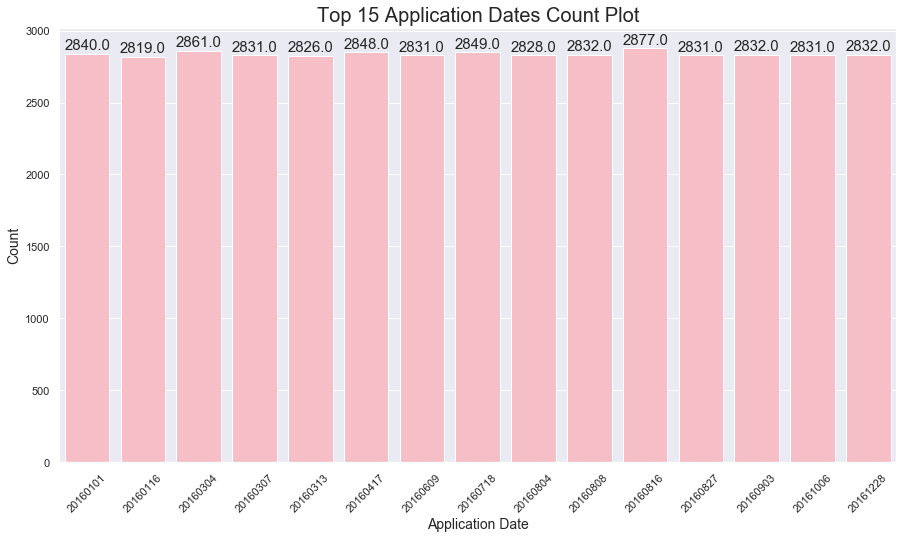

In [122]:
sns.set(style='darkgrid')
# Defining the plot size 
plt.figure(figsize=(15, 8)) 

# Defining the values for x-axis, y-axis 
# and from which datafarme the values are to be picked 
plots = sns.barplot(x='index',y='date',data=ssn, color='lightpink')
  
# Iterrating over the bars one-by-one 
for bar in plots.patches: 
    
  # Using Matplotlib's annotate function and 
  # passing the coordinates where the annotation shall be done 
  # x-coordinate: bar.get_x() + bar.get_width() / 2 
  # y-coordinate: bar.get_height() 
  # free space to be left to make graph pleasing: (0, 8) 
  # ha and va stand for the horizontal and vertical alignment 
    plots.annotate(format(bar.get_height(), '.2f'),  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='center', 
                   size=15, xytext=(0, 8), 
                   textcoords='offset points') 
# Setting the label for x-axis 
plt.xlabel("Application Date", size=14) 
  
# Setting the label for y-axis 
plt.ylabel("Count", size=14) 
  
# Setting the title for the graph 
plt.title("Top 15 Application Dates Count Plot", size=20) 
plt.xticks(rotation=45)
  
# Fianlly showing the plot 
plt.show() 

### loop for plot

In [79]:
column=['firstname', 'lastname', 'address', 'zip5', 'fraud_label']

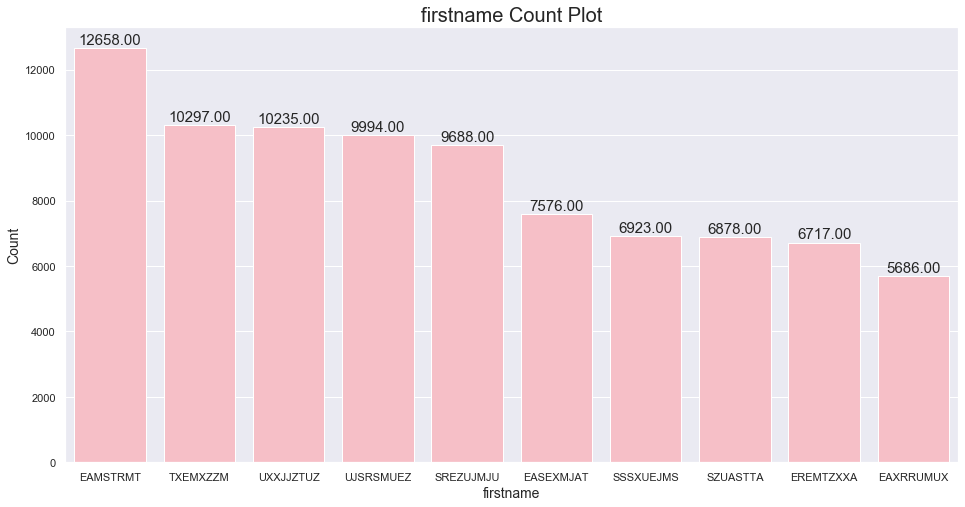

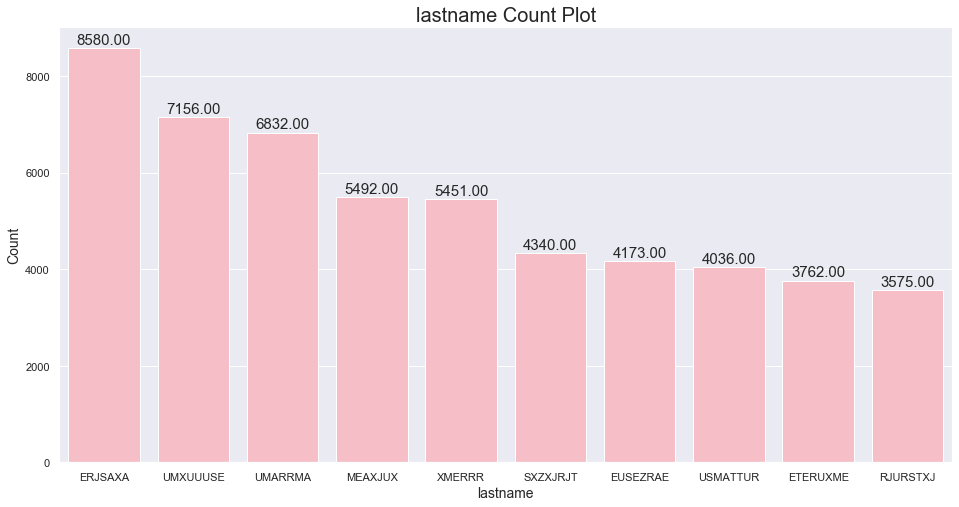

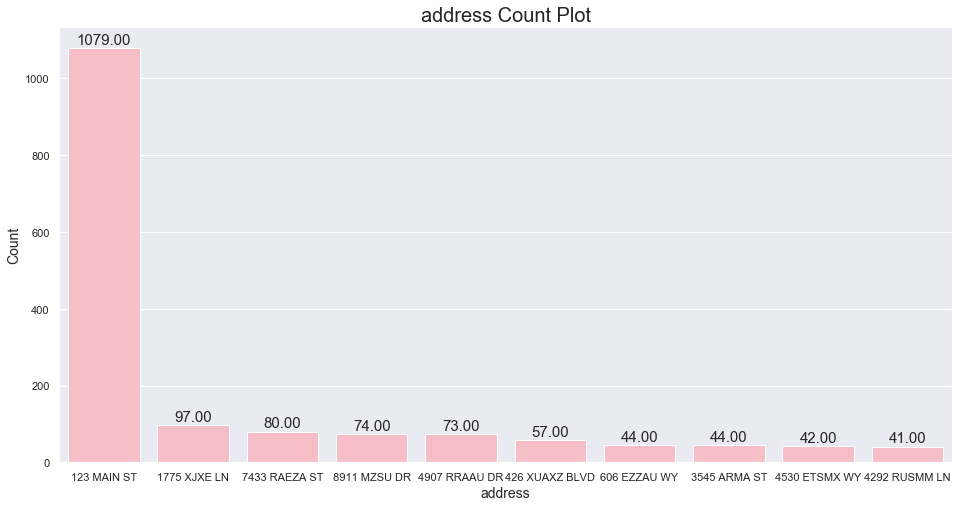

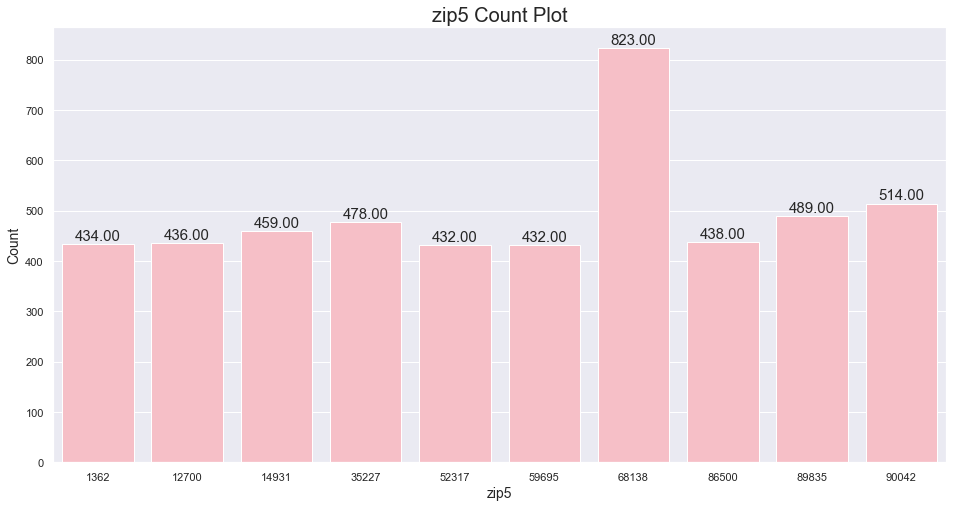

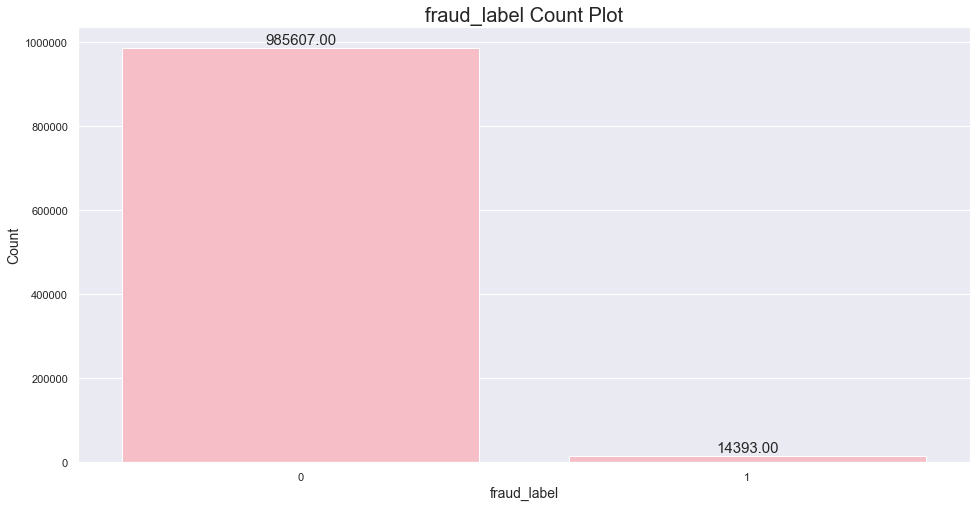

In [92]:
column=['firstname', 'lastname', 'address', 'zip5', 'fraud_label']
for i in column:
    df=pd.DataFrame(data[i].value_counts().head(10))
    df=df.reset_index()
    sns.set(style='darkgrid')
# Defining the plot size 
    plt.figure(figsize=(16, 8)) 

  # Defining the values for x-axis, y-axis 
# and from which datafarme the values are to be picked 
    plots = sns.barplot(x='index',y=i,data=df, color='lightpink')
  # Iterrating over the bars one-by-one 
    for bar in plots.patches: 
    
  # Using Matplotlib's annotate function and 
  # passing the coordinates where the annotation shall be done 
  # x-coordinate: bar.get_x() + bar.get_width() / 2 
  # y-coordinate: bar.get_height() 
  # free space to be left to make graph pleasing: (0, 8) 
  # ha and va stand for the horizontal and vertical alignment 
        plots.annotate(format(bar.get_height(), '.2f'),  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='center', 
                   size=15, xytext=(0, 8), 
                   textcoords='offset points') 
# Setting the label for x-axis 
    plt.xlabel(i, size=14) 
  # Setting the label for y-axis 
    plt.ylabel("Count", size=14) 
  # Setting the title for the graph 
    plt.title(f'{i} Count Plot', size=20) 
  # Fianlly showing the plot 
    plt.show() 

### dob

In [114]:
data['dob'].value_counts()

19070626    126568
19640318      4818
19760625      3723
19880628      1404
19740216       980
             ...  
19280730         5
19450523         5
19750509         5
19190223         5
19441127         5
Name: dob, Length: 42673, dtype: int64

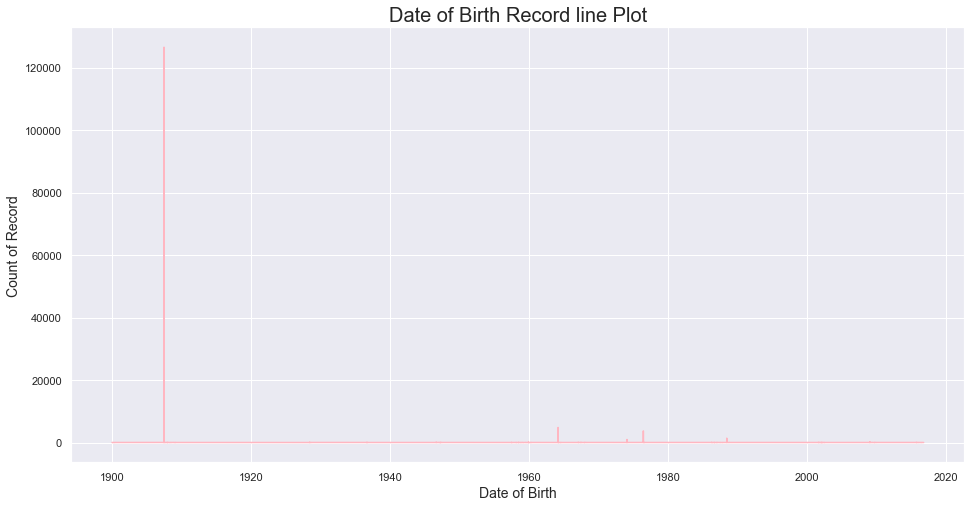

In [113]:
plt.figure(figsize=(16, 8)) 
date=data.groupby('dob').size().reset_index()
for i in range(len(date)):
    date.iloc[i,0]=str(date.iloc[i,0])[:4]+'-'+str(date.iloc[i,0])[4:6]+'-'+str(date.iloc[i,0])[6:]
date.rename(columns={0: "Count"}, inplace=True)
date['dob']=pd.to_datetime(date['dob'])
sns.lineplot(x=date['dob'],y=date['Count'],color='lightpink' )
plt.xlabel('Date of Birth', size=14) 
  # Setting the label for y-axis 
plt.ylabel("Count of Record", size=14) 
  # Setting the title for the graph 
plt.title('Date of Birth Record line Plot', size=20) 
plt.show() 

### date

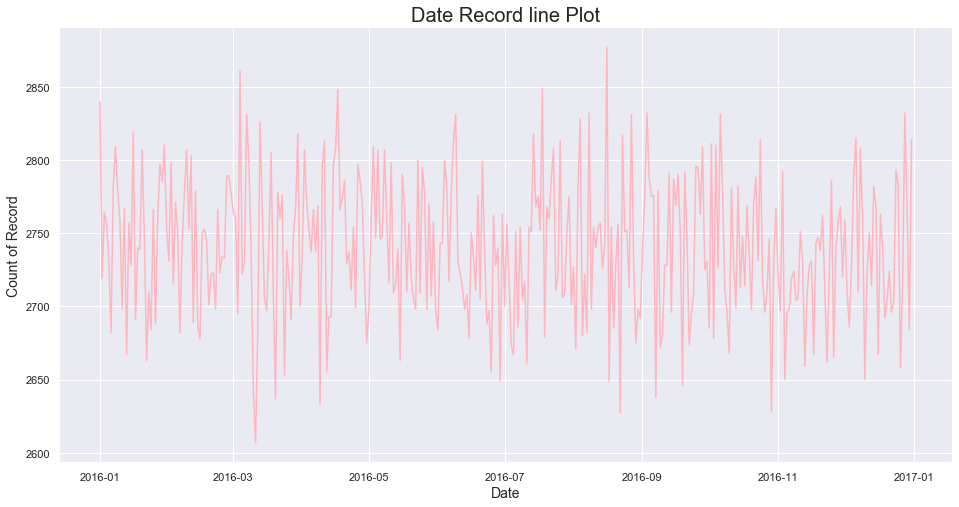

In [13]:
plt.figure(figsize=(16, 8)) 
date=data.groupby('date').size().reset_index()
for i in range(len(date)):
    date.iloc[i,0]=str(date.iloc[i,0])[:4]+'-'+str(date.iloc[i,0])[4:6]+'-'+str(date.iloc[i,0])[6:]
date.rename(columns={0: "Count"}, inplace=True)
date['date']=pd.to_datetime(date['date'])
sns.lineplot(x=date['date'],y=date['Count'],color='lightpink' )
plt.xlabel('Date', size=14) 
  # Setting the label for y-axis 
plt.ylabel("Count of Record", size=14) 
  # Setting the title for the graph 
plt.title('Date Record line Plot', size=20) 
plt.show() 

In [43]:
data=pd.read_csv('applications data.csv', index_col=0)
data

,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label
record,,,,,,,,,
1,20160101,379070012,XRRAMMTR,SMJETJMJ,6861 EUTST PL,2765,19070626,1797504115,0
2,20160101,387482503,MAMSTUJR,RTTEMRRR,7280 URASA PL,57169,19340615,4164239415,1
3,20160101,200332444,SZMMUJEZS,EUSEZRAE,5581 RSREX LN,56721,19070626,216537580,0
4,20160101,747451317,SJJZSXRSZ,ETJXTXXS,1387 UJZXJ RD,35286,19440430,132144161,0
5,20160101,24065868,SSSXUEJMS,SSUUJXUZ,279 EAASA WY,3173,19980315,6101082272,0
...,...,...,...,...,...,...,...,...,...
999996,20161231,766104848,XUSAAURMZ,EJXXEXZX,8079 EJRUJ AVE,54890,19550418,8236558223,0
999997,20161231,445178058,SAAJJEMTX,UMAUETJX,4817 UMSXT AVE,74683,19150624,6790134432,0
999998,20161231,25283410,ESRXXRSUX,EUEJRJJE,7562 RJMAZ ST,86805,19880628,3997657622,0


In [44]:
data['date'].value_counts()

20160816    2877
20160304    2861
20160718    2849
20160417    2848
20160101    2840
            ... 
20160320    2637
20160409    2633
20161029    2628
20160822    2627
20160311    2607
Name: date, Length: 365, dtype: int64

In [45]:
date=pd.DataFrame(data['date'].value_counts())
date=date.reset_index()
#ssn=ssn.iloc[1:]
date

,index,date
0,20160816,2877
1,20160304,2861
2,20160718,2849
3,20160417,2848
4,20160101,2840
...,...,...
360,20160320,2637
361,20160409,2633
362,20161029,2628
363,20160822,2627


In [46]:
for i in range(len(date)):
    date.iloc[i,0]=str(date.iloc[i,0])[:4]+'-'+str(date.iloc[i,0])[4:6]+'-'+str(date.iloc[i,0])[6:]

In [48]:
date['index']=pd.to_datetime(date['index'])

In [49]:
date

,index,date
0,2016-08-16,2877
1,2016-03-04,2861
2,2016-07-18,2849
3,2016-04-17,2848
4,2016-01-01,2840
...,...,...
360,2016-03-20,2637
361,2016-04-09,2633
362,2016-10-29,2628
363,2016-08-22,2627


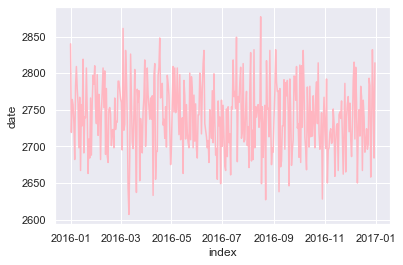

In [50]:
sns.lineplot(x=date['index'],y=date['date'],color='lightpink' )